# Data processing

# Table of contents

- [1. Data exploration](#1.-Data-exploration)
- [2. Data extraction](#2.-Data-extraction)
- [3. Data cleaning](#3.-Data-cleaning-process)

#### Importing the modules

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

# 1. Data exploration

#### As stated before, we will drop the columns that are not worth keeping track of. We will also drop the columns that contain information writtein in Portuguese.

In [2]:
COLUMNS = ['payment_value', 'payment_installments', 'product_category_name_english', 'product_photos_qty', 'freight_value','price', 
           'shipping_limit_date', 'seller_state', 'seller_city', 'seller_zip_code_prefix', 'customer_state', 'customer_city', 
           'customer_zip_code_prefix', 'review_score', 'order_delivered_customer_date', 'order_delivered_carrier_date','order_estimated_delivery_date',
           'order_status', 'payment_type', 'seller_id_x']

In [3]:
def get_clean_df():
    global COLUMNS
    df = pd.read_csv('data/merged.csv', parse_dates=['order_delivered_customer_date','order_estimated_delivery_date', 'order_delivered_carrier_date','shipping_limit_date'])    
    df = df[COLUMNS]
    return df

In [4]:
df = get_clean_df()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139914 entries, 0 to 139913
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_value                  139911 non-null  float64       
 1   payment_installments           139911 non-null  float64       
 2   product_category_name_english  136910 non-null  object        
 3   product_photos_qty             136936 non-null  float64       
 4   freight_value                  138907 non-null  float64       
 5   price                          138907 non-null  float64       
 6   shipping_limit_date            138907 non-null  datetime64[ns]
 7   seller_state                   54482 non-null   object        
 8   seller_city                    54482 non-null   object        
 9   seller_zip_code_prefix         54482 non-null   float64       
 10  customer_state                 139914 non-null  object        
 11  

In [6]:
df.sample(10)

,payment_value,payment_installments,product_category_name_english,product_photos_qty,freight_value,price,shipping_limit_date,seller_state,seller_city,seller_zip_code_prefix,customer_state,customer_city,customer_zip_code_prefix,review_score,order_delivered_customer_date,order_delivered_carrier_date,order_estimated_delivery_date,order_status,payment_type,seller_id_x
71386,46.78,1.0,computers_accessories,3.0,7.78,39.00,2018-01-11 19:57:19,NaN,NaN,NaN,SP,campinas,13061,5.0,2018-01-17 18:32:20,2018-01-08 16:30:07,2018-01-24,delivered,credit_card,NaN
122913,53.71,1.0,computers_accessories,1.0,8.72,44.99,2017-05-25 04:15:21,NaN,NaN,NaN,SP,itu,13309,5.0,2017-05-24 10:19:30,2017-05-22 12:57:06,2017-06-02,delivered,boleto,NaN
67723,114.86,1.0,bed_bath_table,1.0,19.86,95.00,2018-06-21 03:36:56,MG,juiz de fora,36015.0,MG,juiz de fora,36015,5.0,2018-06-26 19:44:26,2018-06-19 14:26:00,2018-07-16,delivered,boleto,2b2fed75b8e5ea3a052fc4c0825da485
87483,369.65,4.0,furniture_decor,1.0,0.03,35.00,2018-04-26 18:31:03,SP,franca,14405.0,SP,franca,14405,1.0,2018-04-26 19:48:45,2018-04-23 19:31:49,2018-05-16,delivered,credit_card,002100f778ceb8431b7a1020ff7ab48f
6860,141.97,1.0,housewares,2.0,46.97,95.00,2018-08-19 22:45:11,SP,limeira,13481.0,SP,limeira,13481,5.0,2018-08-20 18:07:04,2018-08-15 08:11:00,2018-08-29,delivered,debit_card,b499c00f28f4b7069ff6550af8c1348a
39303,92.57,4.0,stationery,2.0,13.57,79.00,2018-01-10 08:31:55,SP,sao jose dos campos,12233.0,SP,sao jose dos campos,12233,3.0,2018-01-13 01:27:54,2018-01-08 11:42:27,2018-01-29,delivered,credit_card,8e6d7754bc7e0f22c96d255ebda59eba
102669,206.44,5.0,health_beauty,2.0,16.54,189.90,2017-02-11 23:17:55,NaN,NaN,NaN,PR,santa mariana,86350,5.0,2017-02-15 09:32:18,2017-02-08 05:34:59,2017-03-17,delivered,credit_card,NaN
115201,38.23,1.0,telephony,2.0,18.24,19.99,2018-08-24 13:30:40,NaN,NaN,NaN,RJ,petropolis,25660,4.0,2018-08-27 20:54:41,2018-08-22 11:16:00,2018-09-28,delivered,credit_card,NaN
71481,138.62,3.0,health_beauty,1.0,18.72,119.90,2018-06-15 16:21:13,NaN,NaN,NaN,SP,sao paulo,2017,5.0,2018-06-15 16:46:49,2018-06-08 13:06:00,2018-07-04,delivered,credit_card,NaN
14066,24.42,2.0,furniture_decor,3.0,14.52,9.90,2017-04-27 12:10:32,SP,sao paulo,3237.0,SP,sao paulo,3237,1.0,NaT,NaT,2017-05-15,canceled,credit_card,b76dba6c951ab00dc4edf0a1aa88037e


#### Percentage of missing values

In [7]:
def get_missing_as_percentage():
    global df
    print(np.round(df.isna().sum() / len(df) * 100, 2))

get_missing_as_percentage()

payment_value                     0.00
payment_installments              0.00
product_category_name_english     2.15
product_photos_qty                2.13
freight_value                     0.72
price                             0.72
shipping_limit_date               0.72
seller_state                     61.06
seller_city                      61.06
seller_zip_code_prefix           61.06
customer_state                    0.00
customer_city                     0.00
customer_zip_code_prefix          0.00
review_score                      0.81
order_delivered_customer_date     2.86
order_delivered_carrier_date      1.76
order_estimated_delivery_date     0.00
order_status                      0.00
payment_type                      0.00
seller_id_x                      61.06
dtype: float64


In [8]:
df.groupby('payment_type').agg({'payment_value':'mean', 'review_score':'mean'})

,payment_value,review_score
payment_type,,
boleto,182.855558,4.001275
credit_card,180.591413,4.028949
debit_card,163.685835,4.162744
not_defined,0.000000,1.666667
voucher,66.558385,3.951216


# 2. Data extraction

In [9]:
df['date_order_delivered_dateonly'] = df['order_delivered_customer_date'].dt.date

In [10]:
df = df.drop('order_delivered_customer_date', axis=1)

# 3. Data cleaning process

<AxesSubplot:>

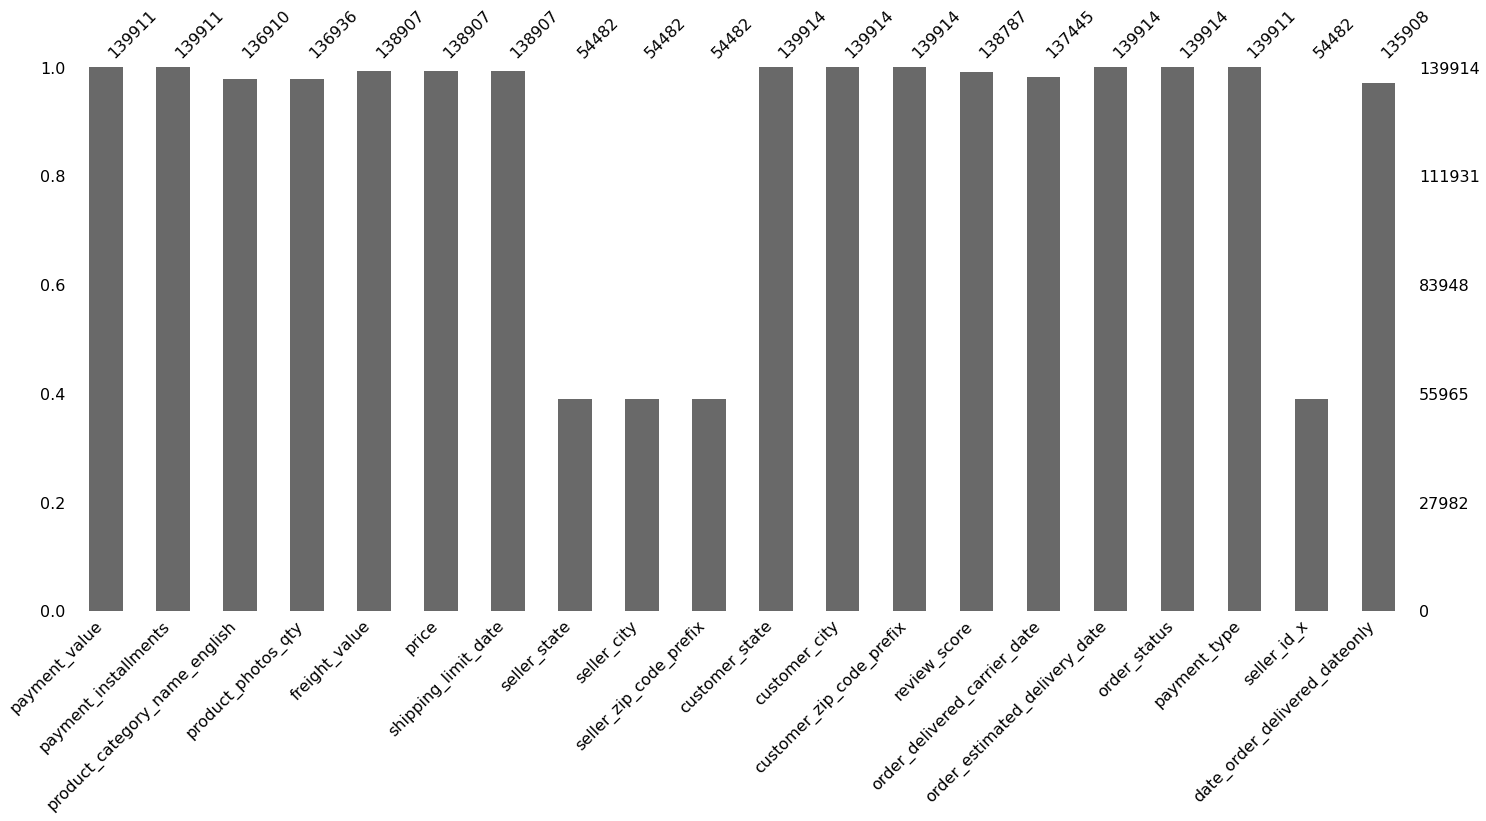

In [11]:
msno.bar(df)

#### As we can see, most of our missing date comes from the three columns - seller_state, seller_city, seller_zip_code_prefix.

#### What's more interesting is the fact, that the same percentage of values is mising for those features. This indicates, that if one value is missing the others are missing as well. Here is a proof:

In [12]:
df[['seller_state', 'seller_city', 'seller_zip_code_prefix']].isna().groupby('seller_state').sum()

,seller_city,seller_zip_code_prefix
seller_state,,
False,0,0
True,85432,85432


#### We are going to fill these values with _Not shared_

In [13]:
df[['seller_city', 'seller_state', 'seller_zip_code_prefix']] = df[['seller_city', 'seller_state', 'seller_zip_code_prefix']].fillna('Not shared')

In [14]:
get_missing_as_percentage()

payment_value                     0.00
payment_installments              0.00
product_category_name_english     2.15
product_photos_qty                2.13
freight_value                     0.72
price                             0.72
shipping_limit_date               0.72
seller_state                      0.00
seller_city                       0.00
seller_zip_code_prefix            0.00
customer_state                    0.00
customer_city                     0.00
customer_zip_code_prefix          0.00
review_score                      0.81
order_delivered_carrier_date      1.76
order_estimated_delivery_date     0.00
order_status                      0.00
payment_type                      0.00
seller_id_x                      61.06
date_order_delivered_dateonly     2.86
dtype: float64


#### We are going to fill missing values in photos quantity as a mean count of photos per category

In [15]:
df['product_category_name_english'] = df['product_category_name_english'].fillna('Unknown')

In [16]:
product_photoQty_dict = np.round(df.groupby('product_category_name_english').agg('mean')['product_photos_qty'])
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_category_name_english'].apply(lambda x: product_photoQty_dict[x]))

In [17]:
df['order_status'].value_counts()

delivered      135914
shipped          1439
canceled          899
unavailable       775
invoiced          444
processing        433
created             5
approved            5
Name: order_status, dtype: int64

In [18]:
df['category'] = df.product_category_name_english
df = df.drop('product_category_name_english',axis=1)

#### Filling freight value based on its mean in the category

In [19]:
freight_per_category = np.round(df.groupby('category').mean()['freight_value'], 2)
df['freight_value'] = df['freight_value'].fillna(df['category'].apply(lambda x: freight_per_category[x]))

In [20]:
df = df.drop('order_delivered_carrier_date', axis = 1)
df = df.drop('date_order_delivered_dateonly', axis = 1)

#### If a review is missing, we are simply going to fill in those values with a mean review of a seller.

In [21]:
df['seller_id'] = df['seller_id_x']
df = df.drop('seller_id_x', axis=1)
df['seller_id'] = df['seller_id'].fillna('Unidentified')

In [22]:
seller_mean_review_score = np.round(df.groupby('seller_id').mean()['review_score'])

In [23]:
df['review_score'] = df['review_score'].fillna(df['seller_id'].apply(lambda x: seller_mean_review_score[x]))

In [24]:
df['review_scire'] = np.round(df['review_score'])

#### Shipping limit date has no impact on our analysis, so we are going to drop it.

In [25]:
df = df.drop('shipping_limit_date', axis=1)

#### We are going to fill in missing 'price' values with the price the customers paid.

In [26]:
df['price'] = df['price'].fillna(df['payment_value'])

In [27]:
get_missing_as_percentage()

payment_value                    0.0
payment_installments             0.0
product_photos_qty               0.0
freight_value                    0.0
price                            0.0
seller_state                     0.0
seller_city                      0.0
seller_zip_code_prefix           0.0
customer_state                   0.0
customer_city                    0.0
customer_zip_code_prefix         0.0
review_score                     0.0
order_estimated_delivery_date    0.0
order_status                     0.0
payment_type                     0.0
category                         0.0
seller_id                        0.0
review_scire                     0.0
dtype: float64


#### As we round up to two decimal places, it is acceptable for us to drop the rest of missing data.

In [28]:
df = df.dropna(axis=0)

In [29]:
df.to_csv('data/cleaned.csv')

## The analysis will be continued in _3\_Analysis.ipynb_